Name: Muley, Tushar
Title: Exercise_3-2_Week_3
Date: April 4, 2021

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Stop warnings for messing up my nice Notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read my CSV
df_formula_one=pd.read_csv('results_final.csv',encoding= 'unicode_escape')

In [4]:
#Review the columns and data
df_formula_one.head()

,circuit_id,circuit_ref,circuit_nm,circuit_type,race_direction,circuit_city,circuit_country,race_nm,races_held,season,...,points_earned,finishing_position,circuit_id.1,driver_id,driver_ref.1,driver_code,first_nm,last_nm,dob,driver_nationality
0,1,albert_park,Albert Park Circuit,Street circuit,Clockwise,Melbourne,Australia,Australian Grand Prix,24,2015,...,25,1,1,1.0,hamilton,HAM,Lewis,Hamilton,1/7/1985,British
1,1,albert_park,Albert Park Circuit,Street circuit,Clockwise,Melbourne,Australia,Australian Grand Prix,24,2015,...,18,2,1,3.0,rosberg,ROS,Nico,Rosberg,6/27/1985,German
2,1,albert_park,Albert Park Circuit,Street circuit,Clockwise,Melbourne,Australia,Australian Grand Prix,24,2015,...,15,3,1,20.0,vettel,VET,Sebastian,Vettel,7/3/1987,German
3,1,albert_park,Albert Park Circuit,Street circuit,Clockwise,Melbourne,Australia,Australian Grand Prix,24,2015,...,12,4,1,13.0,massa,MAS,Felipe,Massa,4/25/1981,Brazilian
4,1,albert_park,Albert Park Circuit,Street circuit,Clockwise,Melbourne,Australia,Australian Grand Prix,24,2015,...,10,5,1,831.0,nasr,NAS,Felipe,Nasr,8/21/1992,Brazilian


In [5]:
#Review the column I have
df_formula_one.columns

Index(['circuit_id', 'circuit_ref', 'circuit_nm', 'circuit_type',
       'race_direction', 'circuit_city', 'circuit_country', 'race_nm',
       'races_held', 'season', 'round', 'circuit_ref.1', 'driver_ref',
       'constructor', 'starting_position', 'time_in_min', 'status',
       'points_earned', 'finishing_position', 'circuit_id.1', 'driver_id',
       'driver_ref.1', 'driver_code', 'first_nm', 'last_nm', 'dob',
       'driver_nationality'],
      dtype='object')

A. Display the same analysis (of the same data) using 3 different charts (e.g.,  a bar chart, a line chart and a pie chart)

B. Use appropriate, complete, professional labeling.

In [6]:
#First Viz with 2015 data. See if starting position has any correlation with ending position
df_viz1=df_formula_one.loc[df_formula_one['season'] > 2015,['circuit_nm','starting_position','finishing_position']]

Text(39.093749999999986, 0.5, 'Circuits Names')

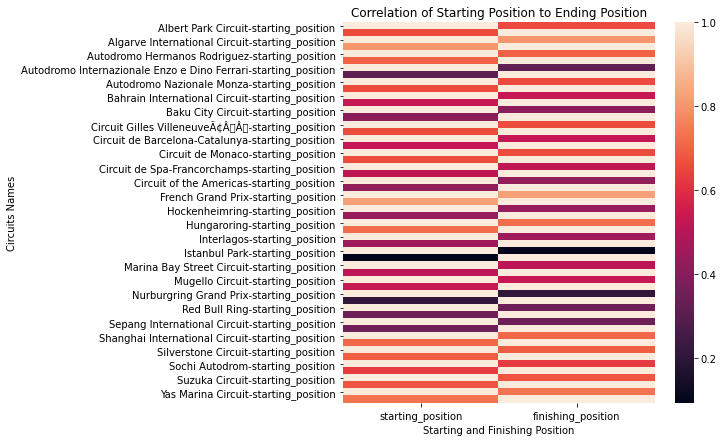

In [7]:
#Building out hte heat map
df_viz1_cor = df_viz1.groupby('circuit_nm')[['starting_position','finishing_position']].corr() #New df with correlation
fig = plt.gcf()
fig.set_size_inches(7,7) #Size of figure
heat_map = sns.heatmap(df_viz1_cor) #Heat map
plt.title ('Correlation of Starting Position to Ending Position') #Title
plt.xlabel ('Starting and Finishing Position') #Label for x axis
plt.ylabel ('Circuits Names') #Label for y axis

In [8]:
#Filter data into df_viz2 for new visual. Country and circuit city to see which country has the most races.
df_viz2 = df_formula_one.groupby(['circuit_country', 'circuit_city']).size().reset_index(name='Count')
#Print to view data
print (df_viz2)


         circuit_country  circuit_city  Count
0              Australia     Melbourne    100
1                Austria     Spielburg    142
2             Azerbaijan          Baku     82
3                Bahrain        Sakhir    142
4                Belgium      Stavelot    122
5                 Brazil     Sao Paulo    102
6                 Canada      Montreal    102
7                  China      Shanghai    102
8                 France  Le Castellet     40
9                Germany    Hockenheim     62
10               Germany   Nurburgring     20
11               Hungary      Budapest    122
12                 Italy         Imola     20
13                 Italy         Monza    122
14                 Italy       Mugello     20
15                 Japan        Suzuka    102
16              Malaysia  Kuala Lumpur     62
17                Mexico   Mexico City    102
18                Monaco   Monte Carlo    102
19              Portugal   PortimÃÂ£o     20
20                Russia         S

In [9]:
#Do a grouping and sum on count
df_viz2 = df_viz2.groupby('circuit_country')['Count'].sum()
print (df_viz2)

circuit_country
Australia               100
Austria                 142
Azerbaijan               82
Bahrain                 142
Belgium                 122
Brazil                  102
Canada                  102
China                   102
France                   40
Germany                  82
Hungary                 122
Italy                   162
Japan                   102
Malaysia                 62
Mexico                  102
Monaco                  102
Portugal                 20
Russia                  122
Singapore               102
Spain                   122
Turkey                   20
United Arab Emirates    122
United Kingdom          142
United States           102
Name: Count, dtype: int64


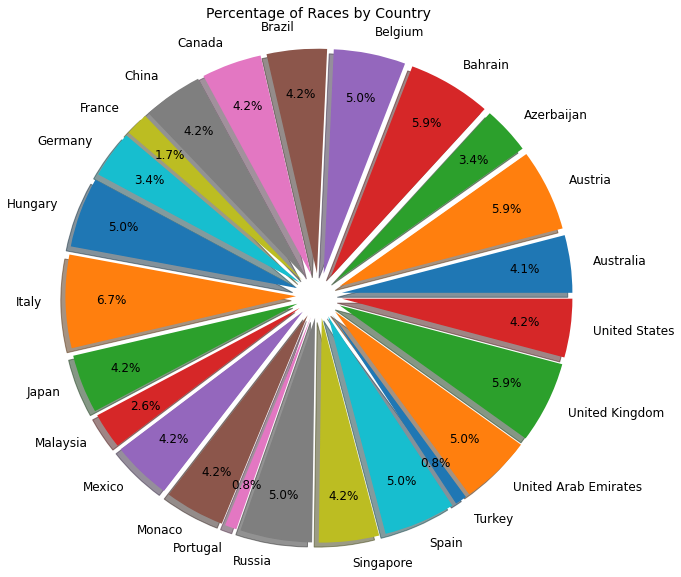

In [10]:
#Build pie chart showing where majority of the races are held
pie, ax = plt.subplots(figsize=[10,10]) #Pie chart size
plt.rcParams["font.size"] = 12 #Font Size
labels = df_viz2.keys() #Use this as the labels
#Set where labels will be
plt.pie(x=df_viz2, autopct="%.1f%%",explode=[0.10]*24, labels=labels, pctdistance=0.8, shadow=True)
plt.axis("auto")
plt.title('Percentage of Races by Country', fontsize=14); #Title




In [11]:
#Checking what the points earned looks like
df_formula_one.points_earned

0       25
1       18
2       15
3       12
4       10
        ..
2415     0
2416     0
2417     0
2418     0
2419     0
Name: points_earned, Length: 2420, dtype: int64

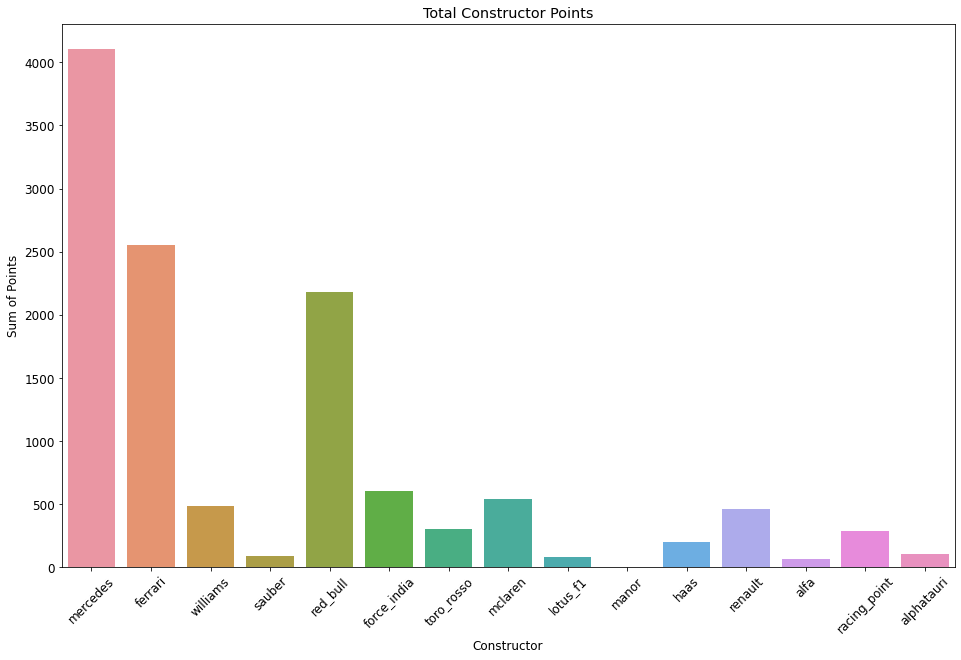

In [12]:
#Visualization 1: Pull points
df_formula_one["sum_points"] = df_formula_one.groupby("constructor")["points_earned"].transform("sum")
fig = plt.gcf() #Set figure
fig.set_size_inches( 16, 10) #Figure size
g=sns.barplot(x = "constructor",y = "sum_points",data = df_formula_one) #Axis
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.title ("Total Constructor Points")
plt.xlabel ("Constructor")
plt.ylabel ("Sum of Points")

# Show the plot
plt.show()


In [14]:
#Scatter plot
df_viz4 = df_formula_one[['season','round','finishing_position','circuit_ref','last_nm','dob']]
df_viz4.head()

,season,round,finishing_position,circuit_ref,last_nm,dob
0,2015,1,1,albert_park,Hamilton,1/7/1985
1,2015,1,2,albert_park,Rosberg,6/27/1985
2,2015,1,3,albert_park,Vettel,7/3/1987
3,2015,1,4,albert_park,Massa,4/25/1981
4,2015,1,5,albert_park,Nasr,8/21/1992


In [16]:
#Bring in only position 1 finishes
df_viz4=df_viz4[df_viz4['finishing_position']==1]

In [17]:
#Change the date to a single formation and put into a list
dt_of_birth=[]
for dt in df_viz4['dob']:
    dt_of_birth.append(dt)

In [18]:
#Check the list
dt_of_birth

['1/7/1985',
 '6/27/1985',
 '1/7/1985',
 '1/7/1985',
 '6/27/1985',
 '1/7/1985',
 '1/7/1985',
 '7/3/1987',
 '1/7/1985',
 '1/7/1985',
 '7/3/1987',
 '6/27/1985',
 '6/27/1985',
 '1/7/1985',
 '7/3/1987',
 '6/27/1985',
 '1/7/1985',
 '6/27/1985',
 '1/7/1985',
 '6/27/1985',
 '1/7/1985',
 '6/27/1985',
 '6/27/1985',
 '6/27/1985',
 '1/7/1985',
 '1/7/1985',
 '6/27/1985',
 '1/7/1985',
 '1/7/1985',
 '6/27/1985',
 '6/27/1985',
 '7/1/1989',
 '1/7/1985',
 '1/7/1985',
 '6/27/1985',
 '6/27/1985',
 '9/30/1997',
 '1/7/1985',
 '1/7/1985',
 '1/7/1985',
 '7/3/1987',
 '8/28/1989',
 '7/1/1989',
 '7/3/1987',
 '1/7/1985',
 '7/3/1987',
 '1/7/1985',
 '1/7/1985',
 '7/3/1987',
 '1/7/1985',
 '1/7/1985',
 '9/30/1997',
 '9/30/1997',
 '7/3/1987',
 '8/28/1989',
 '1/7/1985',
 '1/7/1985',
 '1/7/1985',
 '8/28/1989',
 '1/7/1985',
 '7/3/1987',
 '9/30/1997',
 '1/7/1985',
 '7/3/1987',
 '7/3/1987',
 '1/7/1985',
 '7/3/1987',
 '7/1/1989',
 '1/7/1985',
 '1/7/1985',
 '1/7/1985',
 '1/7/1985',
 '1/7/1985',
 '9/30/1997',
 '7/1/1989',
 '

In [19]:
#Add the list to the dataframe
df_viz4['date_of_birth'] = dt_of_birth 

In [20]:
#Check the data frame
df_viz4.head()

,season,round,finishing_position,circuit_ref,last_nm,dob,date_of_birth
0,2015,1,1,albert_park,Hamilton,1/7/1985,1/7/1985
18,2015,8,1,red_bull_ring,Rosberg,6/27/1985,6/27/1985
38,2015,4,1,bahrain,Hamilton,1/7/1985,1/7/1985
58,2015,11,1,spa,Hamilton,1/7/1985,1/7/1985
78,2015,18,1,interlagos,Rosberg,6/27/1985,6/27/1985


In [21]:
#Check the dataframe data type.
df_viz4.dtypes

season                 int64
round                  int64
finishing_position     int64
circuit_ref           object
last_nm               object
dob                   object
date_of_birth         object
dtype: object

In [22]:
#Do the conversation from string to datetime64
df_viz4['date_of_birth']  = pd.to_datetime(df_viz4['date_of_birth'])

In [23]:
#Check again make sure it changed to date time
df_viz4.dtypes

season                         int64
round                          int64
finishing_position             int64
circuit_ref                   object
last_nm                       object
dob                           object
date_of_birth         datetime64[ns]
dtype: object

In [24]:
#Find split the drivers year of birth
df_viz4['driver_birth_yr'] = pd.DatetimeIndex(df_viz4['date_of_birth']).year

In [25]:
#Do the calculation for driver age
df_viz4['driver_age'] = df_viz4['season'] - df_viz4['driver_birth_yr'] 

In [26]:
#Check it worked
df_viz4.head()

,season,round,finishing_position,circuit_ref,last_nm,dob,date_of_birth,driver_birth_yr,driver_age
0,2015,1,1,albert_park,Hamilton,1/7/1985,1985-01-07,1985,30
18,2015,8,1,red_bull_ring,Rosberg,6/27/1985,1985-06-27,1985,30
38,2015,4,1,bahrain,Hamilton,1/7/1985,1985-01-07,1985,30
58,2015,11,1,spa,Hamilton,1/7/1985,1985-01-07,1985,30
78,2015,18,1,interlagos,Rosberg,6/27/1985,1985-06-27,1985,30


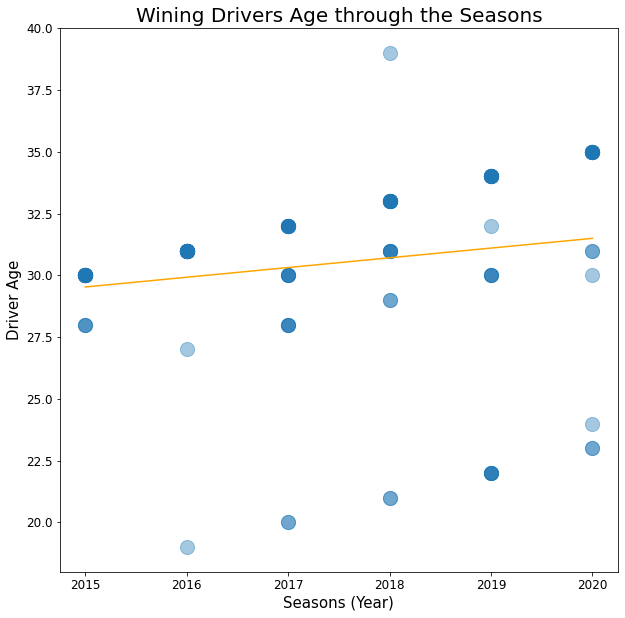

In [28]:
#Plot my scatter plot
plt.figure(figsize=(10,10)) #Figure size
plt.xlabel('Seasons (Year)',fontsize=15) #x axis label and font size
plt.ylabel('Driver Age', fontsize=15) #y axis label and font size
plt.title('Wining Driver''s Age through the Seasons', fontsize=20) #Title
plt.scatter(df_viz4['season'],df_viz4['driver_age'], s=200, marker='o',alpha=0.4)
m, b = np.polyfit(df_viz4['season'],df_viz4['driver_age'], 1)
plt.plot(df_viz4['season'], m*df_viz4['season']+b, color='orange')
plt.show()

C. Rank your charts from most effective to least effective.

1. Scatter plot
2. Bar plot
3. Pie chart

1 most effective 3 least effective
I left off the heat map as I determined it does not really say lot about the data unless I add in context.

D. Write a 300-word paper justifying your ranking.

    How I ranked my graphs from most effective to least effective. I believe the scatter plot I created is very effective. If I had not reduced the size of the data from the original 1950 to 2020 to its current 2015 to 2020 you would miss seeing a key issue. From the 1950 to 2020 the age of the driver finishing first was steadily declining. In the last five year there is has been one dominant team. With a very good challenger in Red Bull. But Mercedes has been the team to beat. Their drivers are getting older as they win more and more races. Since the current crop of drivers are doing so well no new younger drivers have entered the sport. The scatter plot shows this very clearly. 

    The next most effective plot is the bar plot. I believe bar plots are very effective in showing rise and fall. In my version you can quickly see which constructor has the most points compared to the others. It is great for a quick glance and does not require a lot of going over and detailing out if presented to an audience. You can quickly find trends as in mine. Mercedes leading the constructors followed by Ferrari and Red Bull rounding out the top three.

    The third most effective is the pie chart. Normally I believe pie charts are over done in most case. It seems every presentation has a pie chart in it. I had a colleague who once told me pies are for eating not displaying and he was probably correct. I believe if done right they too can convey good information. Pie chart present the current stats and not much more. Pie charts do not normally help with time series or anything time related. It is to show you the current status. I ranked mine second because in my opinion there are too many slices on my pie chart. I believe a reasonable pie chart should probably not have more than five to seven slices. That usually keeps the colors from repeating and they look better compared to ones that are overcrowded.
 	
    In conclusion I ranks my scatter plot as most effective followed by the bar chart, and then the pie chart as the least effective. I think building charts one need to present to others to get a full idea of what is needed before sending your presentation out to a wider audience. I left out the heat map cause after building it I felt is said nothing about the data. So I did a fourth and found it more effective.
